<a href="https://colab.research.google.com/github/alyayasmins/upload_file/blob/main/Booklet_AlyaYasminS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Epoch 1/15
 5/20 [======>.......................] - ETA: 42s - loss: 0.6461 - accuracy: 0.7100

20/20 [==============================] - 40s 2s/step - loss: 0.6461 - accuracy: 0.7100 - val_loss: 0.2797 - val_accuracy: 0.9200


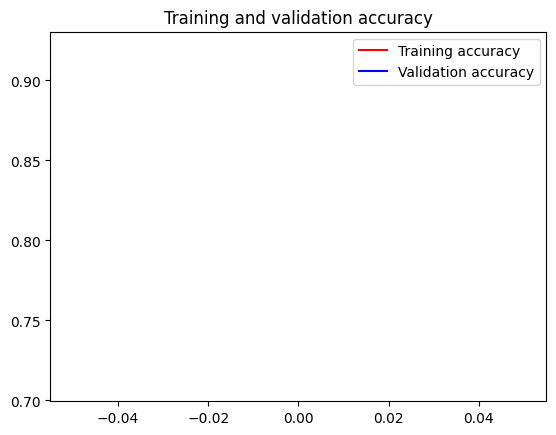

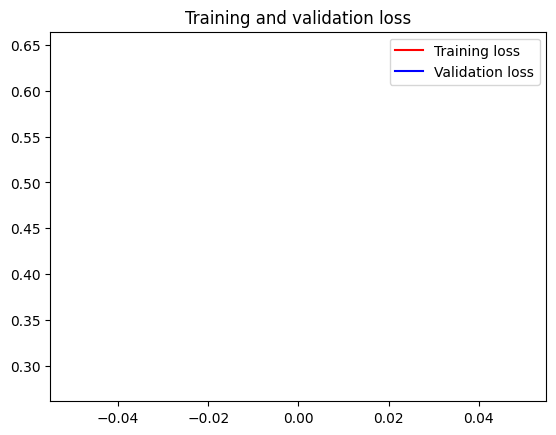

<Figure size 640x480 with 0 Axes>

Saving IMG20240713235131.jpg to IMG20240713235131.jpg
File yang diunggah: IMG20240713235131.jpg
Prediksi: [[0.68335366]]
Nama Anda terdeteksi!


In [ ]:
!pip install tensorflow keras

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/dataset/training'
validation_dir = '/content/drive/My Drive/dataset/validation'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=10
)

model.save('/content/drive/My Drive/alya_model_mobilenet.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

from google.colab import files

uploaded = files.upload()

img_path = list(uploaded.keys())[0]
print(f"File yang diunggah: {img_path}")

from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

model = load_model('/content/drive/My Drive/alya_model_mobilenet.h5')

@tf.function
def predict(model, img_array):
    return model(img_array, training=False)

prediction = predict(model, img_array)
print(f"Prediksi: {prediction}")

threshold = 0.3
if prediction.numpy()[0][0] > threshold:
    print("Nama Anda terdeteksi!")
else:
    print("Nama Anda tidak terdeteksi.")

